# <h1 style='color:blue' align='center'>AI-Driven Hybrid Cyber Defensive System for Intelligent Malware Detection and Threat Insight</h1>


<h4 style = 'color:green'> Malware:</h4>

Malware is a harmful software that pretends to be a legitimate program to infiltrate the computer. It is installed in different ways, but the most common are a phishing email, fake installer, infected attachment, and phishing links.Hackers make malware presentable to convince users into installing them. Often, the users are unaware that the program is malware because it looks legitimate. Basically, that’s how malware gets installed on the computer.Once installed, malware hides in different folders in the computer. If it’s an advanced type of malware, it can directly access the operating system. Then it starts to encrypt files and record personal information. Malware can includes trojan horse, virus, worms, adware and spyware.

<h4 style = 'color:green'> Malware Detection:</h4>
Malware detection is the process of scanning the computer and files to detect malware. It is effective at detecting malware because it involves multiple tools and approaches. It’s not a one-way process, it’s actually quite complex.

<h1 style = 'color:purple'> Step1: Collecting Data</h1>

In [73]:
#import necesary library
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
import pickle
import pefile
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
%matplotlib inline

In [74]:
#load the dataset
df = pd.read_csv("Malware_Detection_data.csv",sep="|",low_memory=True)
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,512,5,1,0,0,5,1,442368,1024,0,2,33088,1048576,4096,1048576,4096,0,16,5,4.787797,2.247185,6.516364,84070.4,7168,205824,85753.600,16340,205644,7,133,0,0,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,512,1,0,6,0,4,0,253952,1024,0,2,32768,1048576,16384,1048576,4096,0,16,8,2.256582,0.000000,6.562232,27904.0,0,181248,28451.500,8,180988,8,96,0,0,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,512,5,1,0,0,5,1,516096,1024,515385,2,33088,1048576,4096,1048576,4096,0,16,5,5.659426,4.217938,7.977423,99737.6,9728,331264,101043.000,9304,330808,6,107,0,0,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f

<h1 style = 'color:purple'> Step2: Preparing the Data</h1>

# <h2 style = 'color:purple'> 2.1: Visualize the data</h2>

In [75]:
df.shape

(138047, 57)

In [76]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,138047.000000,1.380470e+05,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,2.213743e+05,5.350876e+14,7.323764e+03,694.386694,5.097843,1.092983,68.751983,64.851283,4.861895,1.444602,8.159750e+05,1297.876520,1.797959e+08,2.157403,22312.125283,9.302477e+05,5.445543e+03,1.031958e+06,3.429882e+04,3.608506e+04,7.908762e+04,4.994509,4.637599,2.259625,6.958913,1.871513e+05,1.956488e+04,6.506805e+05,1.884237e+05,2.109837e+04,6.349808e+05,5.462937,113.225648,4.338341,23.674263,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,2.188020e+06,9.929589e+16,6.257687e+05,1289.921098,99.220192,77.551077,1185.886042,1139.691397,0.647720,181.180393,6.530065e+06,5595.523021,5.976192e+08,0.452940,15440.574817,5.550081e+05,1.804724e+04,1.817744e+05,7.906877e+06,8.904748e+06,1.466901e+07,1.915329,1.099464,1.831893,1.044297,7.735218e+06,3.540868e+05,3.007226e+07,4.180153e+06,3.543141e+05,1.285463e+07,4.362811,123.134704,34.776745,252.093958,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.553600e+04,1.600000e+01,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,448.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000,0.000000,0.000000,0.000000,6.400000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,2.867200e+04,4.194304e+06,4.096000e+03,512.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.843200e+05,1024.000000,1.065765e+05,2.000000,320.000000,1.048576e+06,4.096000e+03,1.048576e+06,4.096000e+03,0.000000e+00,1.600000e+01,4.000000,4.001088,0.020393,6.417698,1.868800e+04,5.120000e+02

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [78]:
df['legitimate'].value_counts()

legitimate
0    96724
1    41323
Name: count, dtype: int64

In [79]:
legitimet_data = df[0:41323].drop(["legitimate"],axis=1)
malware_data = df[41323::].drop(['legitimate'],axis=1)

print("shape of legititimet dataset is: %s samples, %s features"%(legitimet_data.shape[0],
                                                                  legitimet_data.shape[1]))


print("shape of malware dataset is: %s samples, %s features"%(malware_data.shape[0],
                                                              malware_data.shape[1]))


shape of legititimet dataset is: 41323 samples, 56 features
shape of malware dataset is: 96724 samples, 56 features


In [80]:
malware_data.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [81]:
#display every columns without truncation
pd.set_option("display.max_columns",None)

In [82]:
malware_data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
41323,VirusShare_4a400b747afe6547e09ce0b02dae7f1c,4a400b747afe6547e09ce0b02dae7f1c,332,224,258,11,0,354816,257024,0,183632,4096,360448,4194304.0,4096,512,5,1,0,0,5,1,626688,1024,0,2,33088,1048576,4096,1048576,4096,0,16,5,4.590397,2.378947,6.296826,120524.8,7680,354816,122148.6,16468,354799,7,138,0,0,7,3.914415,1.441688,7.677091,7298.428571,16,28438,72,0
41324,VirusShare_9bd57c8252948bd2fa651ad372bd4f13,9bd57c8252948bd2fa651ad372bd4f13,332,224,271,6,0,24064,164864,1024,12538,4096,28672,4194304.0,4096,512,4,0,6,0,4,0,241664,1024,0,2,32768,1048576,4096,1048576,4096,0,16,5,4.104541,0.000000,6.440106,6758.4,0,24064,46260.8,3144,154712,8,155,1,0,6,3.199107,1.971335,5.214816,452.000000,34,958,0,15
41325,VirusShare_d1456165e9358b8f61f93a5f2042f39c,d1456165e9358b8f61f93a5f2042f39c,332,224,258,10,0,118784,381952,0,59914,4096,122880,4194304.0,4096,512,5,1,0,0,5,1,520192,1024,558287,2,33088,1048576,4096,1048576,4096,0,16,5,5.662408,4.183692,7.961871,100147.2,9216,334848,101559.8,9368,334440,7,114,0,0,18,6.530946,2.458492,7.992688,18523.444444,48,33945,72,14
41326,VirusShare_e4214cc73afbba0f52bb72d5db8f8bb1,e4214cc73afbba0f52bb72d5db8f8bb1,332,224,258,10,0,174592,300032,0,117140,4096,180224,4194304.0,4096,512,5,1,0,0,5,1,487424,1024,513173,2,33088,1048576,4096,1048576,4096,0,16,5,5.735470,4.758260,7.364313,93081.6,15360,192000,94698.8,21500,191664,11,254,15,0,15,5.732393,2.852364,7.987726,12706.133333,118,60500,72,14
41327,VirusShare_710890c07b3f93b90635f8bff6c34605,710890c07b3f93b90635f8bff6c34605,332,224,258,9,0,475648,348672,0,319769,4096,483328,4194304.0,4096,512,5,0,0,0,5,0,856064,1024,1820725856,2,33088,1048576,4096,1048576,4096,0,16,5,5.139934,4.480790,6.558149,164864.0,13824,475648,168145.2,30840,475580,14,421,15,0,59,2.827826,0.960953,7.212329,2637.033898,20,67624,72,0


In [83]:
legitimet_data.take([1])

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.0,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.0,518,1156,72,18


In [84]:
malware_data.take([1])

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
41324,VirusShare_9bd57c8252948bd2fa651ad372bd4f13,9bd57c8252948bd2fa651ad372bd4f13,332,224,271,6,0,24064,164864,1024,12538,4096,28672,4194304.0,4096,512,4,0,6,0,4,0,241664,1024,0,2,32768,1048576,4096,1048576,4096,0,16,5,4.104541,0.0,6.440106,6758.4,0,24064,46260.8,3144,154712,8,155,1,0,6,3.199107,1.971335,5.214816,452.0,34,958,0,15


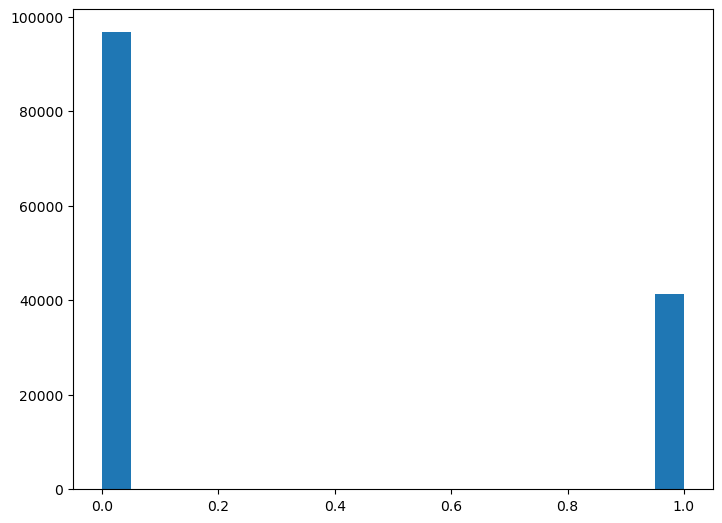

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])  #add_axes(x0, y0, width, height)
ax.hist(df["legitimate"],20)
plt.show()

In [86]:
# fig, ax = plt.subplots(figsize=(20,20))
# sn.heatmap(df.apply(lambda x: x.factorize()[0]).corr(), fmt = 'd',cmap = 'YlOrRd', ax = ax, cbar = True)
# plt.figure(figsize=(20,20))
# plt.show()

<h2 style = 'color:purple'> 2.2: Data Wrangling</h2>

In [87]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

<h4 style='color:green'>NB: The above indicates that there is no missing value inside the dataset.</h4> 

In [88]:
#removing unnecesary data
df= df.drop(['md5','Name'],axis=1)
df.head(5)

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [18]:
#separate dependant and independant variable
#y = df['legitimate']
#X = df.drop(["legitimate"],axis = 1)
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: legitimate, dtype: int64

In [45]:
X = df.iloc[:,:-1]
X.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18


In [46]:
#feature  selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [47]:
extraTrees = ExtraTreesClassifier().fit(X, y)
select = SelectFromModel(extraTrees, prefit=True)
X_new = select.transform(X)
print(X.shape, X_new.shape)

(138047, 54) (138047, 13)


c:\Users\gech\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [89]:
features = X_new.shape[1]
importants = extraTrees.feature_importances_
indies = np.argsort(importants)[::-1]
for f in range(features):
    print("%d. feature:"%(f+1),df.columns[1 + indies[f]], importants[indies[f]])
    


1. feature: SizeOfStackReserve 0.20092562541120884
2. feature: MajorLinkerVersion 0.080122870029992
3. feature: SizeOfOptionalHeader 0.07912439361903881
4. feature: legitimate 0.06258102172904097
5. feature: DllCharacteristics 0.05870837835198408
6. feature: MinorSubsystemVersion 0.05406729097028396
7. feature: SectionsMeanRawsize 0.048393844853315604
8. feature: Characteristics 0.04695382055193181
9. feature: ResourcesMaxEntropy 0.04295439922747171
10. feature: SizeOfStackCommit 0.03900347572888304
11. feature: ResourcesMeanSize 0.03604261237633928
12. feature: SectionAlignment 0.0348831567581853
13. feature: MinorOperatingSystemVersion 0.023436768595254488


<h2 style = 'color:purple'> 2.3: Train test split</h2> 

In [90]:
#spliting the data using train_test_split() methode
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [91]:
X_train.shape

(110437, 54)

<h1 style = 'color:purple'> Step3: Choosing, Training and Evaluating a Model</h1> 

# <h2 style = 'color:green'> A. Random Forest:</h2>

In [92]:
#Choosing random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score,accuracy_score, auc,confusion_matrix
from time import time

In [93]:
# results = list()
# # compare timing for number of cores
# n_cores = [1, 2, 3, 4, 5, 6]
# for n in n_cores:
#     # capture current time
#     start = time()
#     # define the model
#     model = RandomForestClassifier(n_estimators=500, n_jobs=n)
#     # fit the model
#     randomModel = model.fit(X_train, y_train)

#     # capture current time
#     end = time()
#     # store execution time
#     result = end - start
#     print('>cores=%d: %.3f seconds' % (n, result))
    
#     results.append(result)
# plt.ylabel("Excution time (sec)")    
# plt.xlabel("Core")
# plt.plot(n_cores, results)
# plt.show()

In [94]:
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

clf = RandomForestClassifier(max_depth=2, random_state=42, n_jobs=-2)

# Training the model
start_time = time()
randomModel = clf.fit(X_train, y_train)

# Predictions
train_pred = randomModel.predict(X_train)
prediction = randomModel.predict(X_test)

# Evaluation
acc_score_tr = accuracy_score(y_train, train_pred)
acc_score_ts = accuracy_score(y_test, prediction)
f1_s = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

# Output
print("Accuracy on training dataset: %.2f%%" % (acc_score_tr * 100.0))
print("Accuracy on testing dataset: %.2f%%" % (acc_score_ts * 100.0))
print("F1 Score: %.2f%%" % (f1_s * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

end_time = time()
execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))


Accuracy on training dataset: 98.35%
Accuracy on testing dataset: 98.44%
F1 Score: 97.41%
Precision: 97.92%
Recall: 96.91%
Execution time: 2.12 seconds


In [95]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,prediction)
conf_matrix

array([[19078,   172],
       [  258,  8102]], dtype=int64)

Confusion matrix without normalization


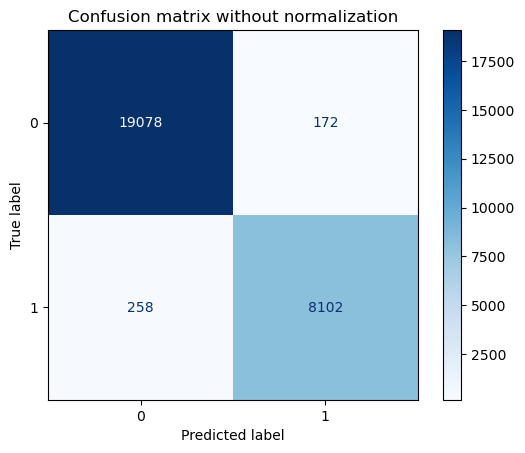

Normalized confusion matrix


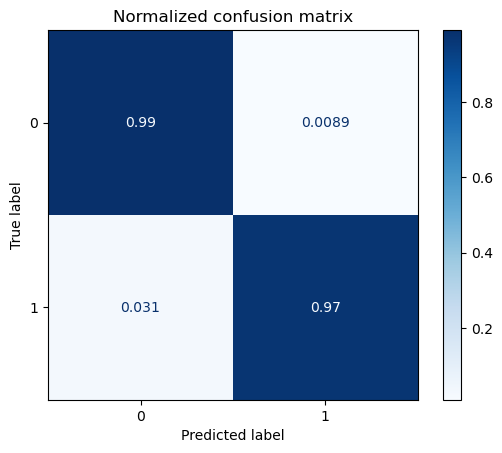

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [("Confusion matrix without normalization", None),
                 ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        randomModel,
        X_test, 
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize
    )
    disp.ax_.set_title(title)
    print(title)
    plt.show()

# <h4 style = 'color:blue'> Percent of False negative = False negative/(True negative + false negative)</h4>
<h4 style = 'color:blue'> Percent of False posetive = False posetive/(True posetive + false posetive)</h4>

In [97]:
fp = conf_matrix[0][1]/sum(conf_matrix)[0]
fn = conf_matrix[1][0]/sum(conf_matrix)[1]
print("False posetive = %.2f%%"%(fp*100.0))
print("False negative = %.2f%%"%(fn*100.0))

False posetive = 0.89%
False negative = 3.12%


# <h2 style = 'color:green'> B. XGBoost classifier:</h2>

In [98]:
from xgboost import XGBClassifier

In [99]:
xgb1 = XGBClassifier(n_estimators = 42, n_jobs=-2, random_state = 4)
start_time = time()
xgb1.fit(X_train, y_train)
# Predictions
train_pred = xgb1.predict(X_train)
prediction = xgb1.predict(X_test)

# Evaluation
acc_score_tr = accuracy_score(y_train, train_pred)
acc_score_ts = accuracy_score(y_test, prediction)
f1_s = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

# Output
print("Accuracy on training dataset: %.2f%%" % (acc_score_tr * 100.0))
print("Accuracy on testing dataset: %.2f%%" % (acc_score_ts * 100.0))
print("F1 Score: %.2f%%" % (f1_s * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

end_time = time()
execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))



Accuracy on training dataset: 99.73%
Accuracy on testing dataset: 99.45%
F1 Score: 99.10%
Precision: 98.96%
Recall: 99.23%
Execution time: 0.70 seconds


In [101]:
from sklearn.metrics import mean_squared_error
msq = mean_squared_error(y_test, prediction)
print("Mean square error: %.2f%% "%(msq*100.0))

Mean square error: 0.55% 


# <h2 style = 'color:green'> C. Logistic Regression:</h2>

In [102]:
#Choosing a model
from sklearn.linear_model import LogisticRegression


In [103]:
clf = LogisticRegression( multi_class='auto', verbose=0,n_jobs = -2)
#train a model
start_time = time()
logModel = clf.fit(X_train, y_train)

#accuracy on training and testing dataset
train_log=logModel.predict(X_train)
pred = logModel.predict(X_test)
acc_tr = accuracy_score(y_train,train_log)
acc_ts = accuracy_score(y_test,pred)
print("Accuracy on training dataset is %.2f%% and on testing dataset is %.2f%% "%(acc_tr*100.0, acc_ts*100.0))
f1 = f1_score(y_test, pred)
print("F1_score: %.2f%% "%(f1*100.0))

precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

end_time = time()
Excution_time = end_time - start_time
print("Excution time was {}secs".format(Excution_time) )




c:\Users\gech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy on training dataset is 95.28% and on testing dataset is 95.38% 
F1_score: 91.87% 
Precision: 98.41%
Recall: 86.14%
Excution time was 7.46080756187439secs


In [31]:
#confusion matrix
conf_matrix_log  = confusion_matrix(y_test, pred)
conf_matrix_log

array([[19250,     0],
       [ 8360,     0]], dtype=int64)

C:\Users\Getcho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


confusion matrix with out normalization


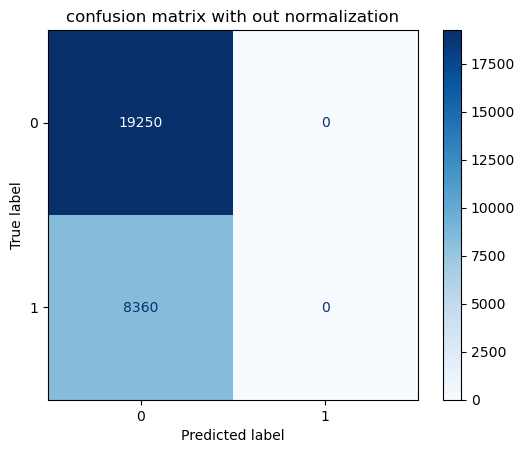

C:\Users\Getcho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix


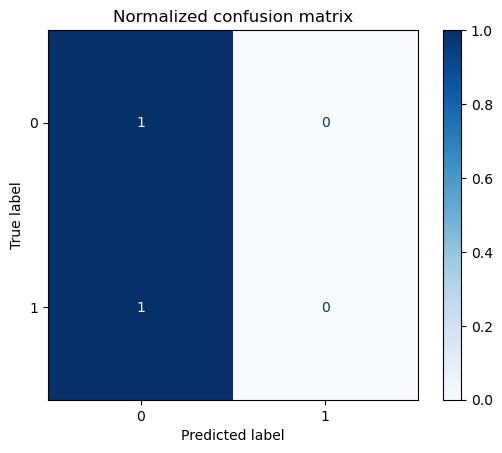

In [32]:
titles_options = [("confusion matrix with out normalization",None),
                 ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logModel, X_test, y_test,
                               
                                cmap=plt.cm.Blues,
                                normalize = normalize)
    disp.ax_.set_title(title)
    print(title)
    plt.show()

# <h4 style = 'color:blue'> Percent of False negative = False negative/(True negative + false negative)</h4>
<h4 style = 'color:blue'> Percent of False posetive = False posetive/(True posetive + false posetive)</h4>

In [33]:
fp = conf_matrix_log[0][1]/sum(conf_matrix)[0]
fn = conf_matrix_log[1][0]/sum(conf_matrix)[1]
print("False posetive = %.2f%%"%(fp*100.0))
print("False negative = %.2f%%"%(fn*100.0))

False posetive = 0.00%
False negative = 101.04%


# <h2 style = 'color:green'> C. Neural Network:</h2>

In [34]:
#Choosing a model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [35]:
# modele = keras.Sequential()
# modele.add(Dense(64, input_dim = 54, activation='relu'))
# modele.add(Dense(16, activation='relu'))
# modele.add(Dense(4,activation='relu'))
# modele.add(Dense(1, activation='sigmoid'))

# modele.summary()


In [36]:
modele= keras.Sequential([
                   Dense(16, input_dim = 54, activation='relu'),
                   Dense(8, activation='relu'),
                   Dense(4,activation='relu'),
                   Dense(1, activation='sigmoid')
                  ])
modele.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                880       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [37]:
#compile the model
modele.compile(loss='binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [40]:
#train a model
modele.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 13s 4ms/step - loss: 0.6090 - accuracy: 0.7015
Epoch 2/5
3452/3452 [==============================] - 13s 4ms/step - loss: 0.6091 - accuracy: 0.7015
Epoch 3/5
3452/3452 [==============================] - 12s 4ms/step - loss: 0.6091 - accuracy: 0.7015
Epoch 4/5
3452/3452 [==============================] - 12s 4ms/step - loss: 0.6090 - accuracy: 0.7015
Epoch 5/5
3452/3452 [==============================] - 13s 4ms/step - loss: 0.6090 - accuracy: 0.7015


In [41]:
#model evaluation
#accuracy on training dataset
trainPred = modele.predict(X_train)
trainPred = [1 if y>=0.5 else 0 for y in trainPred]
accuracy_score(y_train, trainPred)

3452/3452 [==============================] - 9s 3ms/step


0.7015221347917817

In [42]:
#accuracy on test dataset
y_prediction = modele.predict(X_test)
y_prediction = [1 if y>=0.5 else 0 for y in y_prediction]
accuracy_score(y_test, y_prediction)

863/863 [==============================] - 2s 2ms/step


0.6972111553784861

In [43]:
#confusion matrix
conf_matrix_neural = confusion_matrix(y_test, y_prediction)
conf_matrix_neural

array([[19250,     0],
       [ 8360,     0]], dtype=int64)

# <h4 style = 'color:blue'> Percent of False negative = False negative/(True negative + false negative)</h4>
<h4 style = 'color:blue'> Percent of False posetive = False posetive/(True posetive + false posetive)</h4>

In [ ]:
# print("False posetive = ",conf_matrix_neural[0][1]/sum(conf_matrix_neural)[0])
# print("False negative = ", conf_matrix_neural[1][0]/sum(conf_matrix_neural)[1])

In [ ]:
#f1_score(y_test, y_prediction)

In [46]:
#Evaluating Performance on different types of models
model = { "RandomForest":RandomForestClassifier(max_depth = 2, random_state = 42,n_jobs = -1),
        "xgboost":XGBClassifier(n_estimators = 42, n_jobs=-1, random_state = 4),    
         "LogisticRegression":LogisticRegression(multi_class='auto', verbose=0,n_jobs = -1)
          
}

results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

RandomForest : 0.984425932633104 
xgboost : 0.9946034045635639 
LogisticRegression : 0.6972111553784861 


In [47]:
best_model = max(results, key=results.get)
best_model

'xgboost'

In [48]:
#Saving the Classifier model
joblib.dump(model[best_model],'classifier.pkl')

['classifier.pkl']

In [49]:
#Saving Features
open('features.pkl','wb').write(pickle.dumps(features))

5

In [50]:
# Load classifier
clf = joblib.load('classifier.pkl')
#load features
features = pickle.loads(open(os.path.join('features.pkl'),'rb').read())
features

14

In [51]:
pe_df = df[['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'legitimate']]
pe_df

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,512,5,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,512,1,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,512,5,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,53248,4194304.0,4096,512,1,0


<h2 style= 'color:blue'>NB:from the datasete and the algorithim above used I have got the performance metrics of;</h2> 
    <h3 style ='color:purple'>Random Forest: </h3> <h4 style='color:green' align='center'>-> Accuracy = 98.2%   ----training dataset </h4>
                                               <h4 style='color:green' align='center'>-> Accuracy = 98.3%   ----testing dataset </h4>
                                               <h4 style='color:green' align='center'> -> f1_score = 97.3%
    </h4>
    
    
 <h3 style ='color:purple'>XGBoost Classifier: </h3> <h4 style='color:green' align='center'>-> Accuracy = 98.9% </h4>
                                          
     
                         
   <h3 style ='color:purple'>Logistic Regression:</h3> <h4 style='color:green' align='center'>-> Accuracy = 70.1%    ---- training dataset</h4>
                                               <h4 style='color:green' align='center'>-> Accuracy = 69.7%   -------testing dataset</h4>
                                               <h4 style='color:green' align='center'> -> f1_score = 0%
    </h4>
   <h3 style ='color:purple'>Neural network:</h3>   <h4 style='color:green' align='center'>-> Accuracy = 93.8%   -------training dataset</h4>
                                               <h4 style='color:green' align='center'>-> Accuracy = 94.0%   -------testing dataset</h4>
                                               <h4 style='color:green' align='center'> -> f1_score = 89.3%
    </h4>

  # <h1 style = 'color:green'> Conclusion:</h1>
  <p> * The performance XGBoost classifier is better than the other for those dataset used.</p>
  <p> * Malware is a critical threat to user computer system in terms of stealing confidential information or disabling security.</p>
  <p> * This project presents the use of machine learning algorithims and how the algorithim will play a role in detecting malware with a high accuracy.</p>

In [ ]:
# #Inporting Required Librarires
# import os
# import pefile
# import array
# import math
# import pickle
# import joblib
# import sys
# from PyQt5 import QtWidgets
# from PyQt5.QtWidgets import QApplication, QDialog
# from PyQt5.uic import loadUi
# import win10toast

# #8888888888888888888888888888888888888888888888888

# #Entropy Function - To detect the repetitive patterns that are near to each other in the sequence which would indicate a deviation from the assumption of randomness
# def get_entropy(data):
#     if len(data) == 0:
#         return 0.0
#     occurences = array.array('L', [0]*256)
#     for x in data:
#         occurences[x if isinstance(x, int) else ord(x)] += 1

#     entropy = 0
#     for x in occurences:
#         if x:
#             p_x = float(x) / len(data)
#             entropy -= p_x*math.log(p_x, 2)

#     return entropy

# #Function to Extract Resources
# def get_resources(pe):
#     resources = []
#     if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
#         try:
#             for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
#                 if hasattr(resource_type, 'directory'):
#                     for resource_id in resource_type.directory.entries:
#                         if hasattr(resource_id, 'directory'):
#                             for resource_lang in resource_id.directory.entries:
#                                 data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
#                                 size = resource_lang.data.struct.Size
#                                 entropy = get_entropy(data)

#                                 resources.append([entropy, size])
#         except Exception as e:
#             return resources
#     return resources


# #Function to Get Info of each Resource
# def get_version_info(pe):
#     res = {}
#     for fileinfo in pe.FileInfo:
#         if fileinfo.Key == 'StringFileInfo':
#             for st in fileinfo.StringTable:
#                 for entry in st.entries.items():
#                     res[entry[0]] = entry[1]
#         if fileinfo.Key == 'VarFileInfo':
#             for var in fileinfo.Var:
#                 res[var.entry.items()[0][0]] = var.entry.items()[0][1]
#     if hasattr(pe, 'VS_FIXEDFILEINFO'):
#           res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
#           res['os'] = pe.VS_FIXEDFILEINFO.FileOS
#           res['type'] = pe.VS_FIXEDFILEINFO.FileType
#           res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
#           res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
#           res['signature'] = pe.VS_FIXEDFILEINFO.Signature
#           res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
#     return res

# #Function to Extract Infos
# def extract_infos(fpath):
#     res = {}
#     pe = pefile.PE(fpath)
#     res['Machine'] = pe.FILE_HEADER.Machine
#     res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
#     res['Characteristics'] = pe.FILE_HEADER.Characteristics
#     res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
#     res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
#     res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
#     res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
#     res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
#     res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
#     res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
#     try:
#         res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
#     except AttributeError:
#         res['BaseOfData'] = 0
#     res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
#     res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
#     res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
#     res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
#     res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
#     res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
#     res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
#     res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
#     res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
#     res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
#     res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
#     res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
#     res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
#     res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
#     res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
#     res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
#     res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
#     res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
#     res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
#     res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

#     # Sections
#     res['SectionsNb'] = len(pe.sections)
#     entropy = map(lambda x:x.get_entropy(), pe.sections)
#     s=len(list(entropy))
#     res['SectionsMeanEntropy'] = sum(entropy)/float(s)
#     res['SectionsMinEntropy'] = min(entropy,default=0)
#     res['SectionsMaxEntropy'] = max(entropy,default=0)
#     raw_sizes = map(lambda x:x.SizeOfRawData, pe.sections)
#     t=len(list(raw_sizes))
#     res['SectionsMeanRawsize'] = sum(raw_sizes)/float(t)
#     res['SectionsMinRawsize'] = min(raw_sizes,default=0)
#     res['SectionsMaxRawsize'] = max(raw_sizes,default=0)
#     virtual_sizes = map(lambda x:x.Misc_VirtualSize, pe.sections)
    
#     u=len(list(virtual_sizes))
#     res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(u)
#     res['SectionsMinVirtualsize'] = min(virtual_sizes,default=0)
#     res['SectionMaxVirtualsize'] = max(virtual_sizes,default=0)

#     #Imports
#     try:
#         res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
#         imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
#         res['ImportsNb'] = len(imports)
        
#         v=list(filter(lambda x:x.name is None, imports))
#         res['ImportsNbOrdinal'] = len(v)
#     except AttributeError:
#         res['ImportsNbDLL'] = 0
#         res['ImportsNb'] = 0
#         res['ImportsNbOrdinal'] = 0

#     #Exports
#     try:
#         res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
#     except AttributeError:
#         # No export
#         res['ExportNb'] = 0
#     #Resources
#     resources= get_resources(pe)
#     res['ResourcesNb'] = len(resources)
#     if len(resources)> 0:
#         entropy = map(lambda x:x[0], resources)
        
#         w=len(list(entropy))
#         res['ResourcesMeanEntropy'] = sum(entropy)/float(w)
#         res['ResourcesMinEntropy'] = min(entropy,default=0)
#         res['ResourcesMaxEntropy'] = max(entropy,default=0)
#         sizes = map(lambda x:x[1], resources)
        
#         p=len(list(sizes))
#         res['ResourcesMeanSize'] = sum(sizes)/float(p)
#         res['ResourcesMinSize'] = min(sizes,default=0)
#         res['ResourcesMaxSize'] = max(sizes,default=0)
#     else:
#         res['ResourcesNb'] = 0
#         res['ResourcesMeanEntropy'] = 0
#         res['ResourcesMinEntropy'] = 0
#         res['ResourcesMaxEntropy'] = 0
#         res['ResourcesMeanSize'] = 0
#         res['ResourcesMinSize'] = 0
#         res['ResourcesMaxSize'] = 0

#     # Load configuration size
#     try:
#         res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
#     except AttributeError:
#         res['LoadConfigurationSize'] = 0


#     # Version configuration size
#     try:
#         version_infos = get_version_info(pe)
#         res['VersionInformationSize'] = len(version_infos.keys())
#     except AttributeError:
#         res['VersionInformationSize'] = 0
#     return res

# #*000000000000000000000000000000000000000

# class my_window(QDialog):
#     def __init__(self):
#         super(my_window,self).__init__()
#         width = 700
#         height = 400
#         self.setGeometry(550, 200, 700, 400)
#         self.setWindowTitle("ሀሁ መሞከሪያ መሳሪያ")
#         self.setStyleSheet('background-color: #262D37;')

#         #define function in main class
#         self.initUI()
#         self.result_display()
        

#     #function for button and labels

#     def initUI(self):
#         self.lbl_Title = QtWidgets.QLabel(self)
#         self.lbl_Title.setText("Well Come to Malware Detection tool ")
#         self.lbl_Title.move(70,50)
#         self.lbl_Title.setStyleSheet('color:pink;'
#                                        'font-size:28px;' 
#                                        'font-weight:bold ')

                
#         self.txt_surname = QtWidgets.QLineEdit(self)
#         self.txt_surname.move(200,90)
#         self.txt_surname.resize(200,32)

#         # button for file browse
#         btn = QtWidgets.QPushButton('Browse Files', self)
#         btn.resize(250, 75)
#         btn.clicked.connect(self.FileBrowse)
#         btn.move(150, 170) 
#         btn.setStyleSheet('background:pink;'
#                           'font-size:20px;' 
#                           'border:2px solid purple;'  
#                           'font-weight:bold; '
#                           'border-radius:75px;'
#                           )

#         # button for save file
#         self.btn_save = QtWidgets.QPushButton(self)
#         self.btn_save.setText("Save")
#         self.btn_save.clicked.connect(self.clicked)
#         self.btn_save.move(200,350)
#         self.btn_save.setStyleSheet('background-color:blue;' 
#                                     'color: white;' 
#                                     'font-size = 20px;'
#                                     )

#     # method for display result 
#     def clicked(self):
#         self.lbl_result.setText('Name\t :')
#         print("hello")

#     def result_display(self):
#         self.lbl_result = QtWidgets.QLabel(self)
#         self.lbl_result.setText("results")
#         self.lbl_result.move(200,300)
#         #self.lbl_result.resize(200,200)

#     # method for file browse
#     def FileBrowse(self):
#         self.lbl_result = QtWidgets.QLabel(self)
#         self.lbl_result.setText("results")
#         self.lbl_result.move(200,300)

#         filepath ,flag = QtWidgets.QFileDialog.getOpenFileNames(self, 
#                                                        'Multiple File',
#                                                        "C:\\Users\\Getcho\\Downloads\Programs",
#                                                        "*.exe"
#                                                        )
#         # for loop for itereting each pe file  
#         for file_path in filepath:
           
#             if file_path!='':
#                 clf = joblib.load("classifier.pkl")
#                 features=pickle.loads(open("features.pkl",'rb').read())
            
#                 try:   
#                     data = extract_infos(file_path)
#                     pe_features = list(map(lambda x:data[x], features))
#                     res= clf.predict([pe_features])[0]
#                     print('...............................................')
#                     ans=('%s - %s' %(os.path.basename(file_path),['MALICIOUS SOFTWARE', 'SAFE SOFTWARE'][res])) 
#                     print(ans)
#                     print('................................................')

#                     toaster=win10toast.ToastNotifier()
#                     if(res==1):
#                         toaster.show_toast('Malware Detector Tool',ans,duration=10,icon_path="C:/Users/Getcho/Pictures/Malware_detection/Delete.ico")
#                     else:
#                         toaster.show_toast('Malware Detector Tool',ans,duration=10,icon_path="C:/Users/Getcho/Pictures/Malware_detection/Delete.ico")
#                 except:
#                     toas_error=win10toast.ToastNotifier()
#                     toas_error.show_toast('Malware Detector','Invalid FILE FORMAT',duration=10,icon_path="Oxygen-Icons.org-Oxygen-Actions-window-close.ico")

#         print("file path: ", filepath)

# def MainWindow():
#         app = QApplication(sys.argv)
#         win = my_window()
#         win.show() #displays the widget on the monitor screen.
#         sys.exit(app.exec_())

        
# MainWindow()

# # if __name__ == '__main__':
# #         app = QApplication(sys.argv)
# #         win = my_window()
# #         win.show() #displays the widget on the monitor screen.
# #         sys.exit(app.exec_())

In [ ]:
#pip install pefile

In [ ]:
#pip install win10toast

In [50]:
# After feature selection
from sklearn.feature_selection import SelectFromModel

extraTrees = ExtraTreesClassifier().fit(X, y)
select = SelectFromModel(extraTrees, prefit=True)
X_new = select.transform(X)

# Get the selected feature NAMES (not just count)
selected_features = X.columns[select.get_support()]  # This is what you need to save

# Save the feature names
with open('features.pkl', 'wb') as f:
    pickle.dump(selected_features.tolist(), f)  # Save as list of feature names

c:\Users\gech\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [51]:
# After XGBoost training
xgb1 = XGBClassifier(n_estimators=42, n_jobs=-2, random_state=4)
xgb1.fit(X_train, y_train)

# Save using joblib (better for sklearn models)
joblib.dump(xgb1, 'classifier.pkl')

# Or for XGBoost specifically, use its native save:
xgb1.save_model('classifier.json')  # This avoids pickle version issues

NameError: name 'XGBClassifier' is not defined

Original shape: (138047, 57)


c:\Users\gech\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features (15):
['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'ImageBase', 'MajorOperatingSystemVersion', 'MajorSubsystemVersion', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize']


c:\Users\gech\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:03:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy: 99.50%
Testing Accuracy: 99.29%
F1 Score: 98.84%


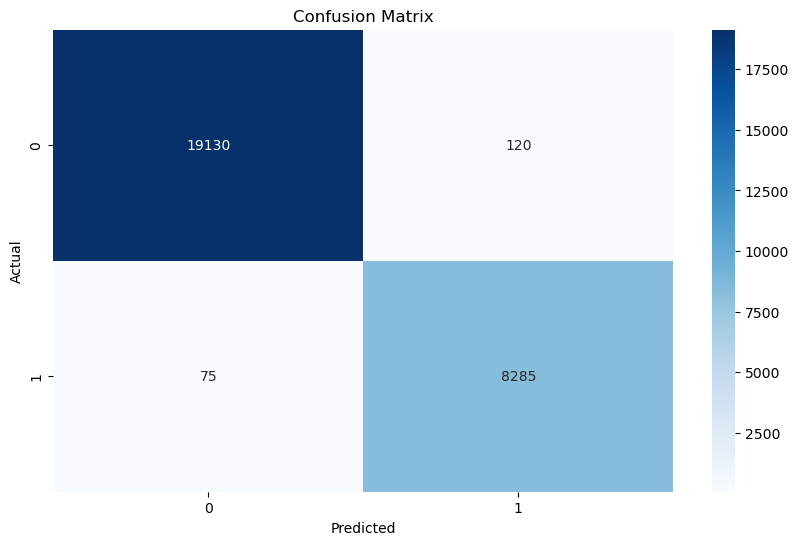

Model and features saved successfully.


In [53]:
# ==== IMPORTS ====
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib
import pickle
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ==== LOAD DATA ====
df = pd.read_csv("Malware_Detection_data.csv", sep="|", low_memory=True)
print("Original shape:", df.shape)

# Drop unnecessary columns
df = df.drop(['md5', 'Name'], axis=1)

# Separate features and labels
X = df.drop(['legitimate'], axis=1)
y = df['legitimate']

# ==== FEATURE SELECTION ====
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees.fit(X, y)

selector = SelectFromModel(extra_trees, prefit=True)
X_selected = selector.transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features (%d):" % len(selected_features))
print(selected_features)

# ==== SPLIT DATA ====
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# ==== TRAIN XGBOOST MODEL ====
xgb_model = XGBClassifier(n_estimators=42, n_jobs=-1, random_state=4, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# ==== EVALUATION ====
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==== SAVE MODEL AND FEATURES ====
joblib.dump(xgb_model, "classifier.pkl")

with open("features.pkl", "wb") as f:
    pickle.dump(selected_features, f)

print("Model and features saved successfully.")


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


# Deep Learning Approach

## Normalize and Reshap Data

In [55]:
# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM/CNN: (samples, time steps, features)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


## LSTM Model Building

In [56]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = lstm_model.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),
                              epochs=10, 
                              batch_size=64, 
                              callbacks=[early_stop],
                              verbose=1)


c:\Users\gech\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 62s 34ms/step - accuracy: 0.8436 - loss: 0.3691 - val_accuracy: 0.8971 - val_loss: 0.2718
Epoch 2/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.8929 - loss: 0.2904 - val_accuracy: 0.9645 - val_loss: 0.1466
Epoch 3/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9616 - loss: 0.1562 - val_accuracy: 0.9643 - val_loss: 0.1384
Epoch 4/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.9629 - loss: 0.1383 - val_accuracy: 0.9632 - val_loss: 0.1177
Epoch 5/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9634 - loss: 0.1260 - val_accuracy: 0.9645 - val_loss: 0.1101
Epoch 6/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.9629 - loss: 0.1157 - val_accuracy: 0.9650 - val_loss: 0.1031
Epoch 7/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 66s 38ms/step - accuracy: 0.9633 - loss: 0.1141 - val_accuracy: 0.9652 - val_loss: 0.0981
Epoch 8/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - accuracy: 0.9649 -

## CNN Model Building

In [57]:
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test),
                            epochs=10, 
                            batch_size=64,
                            callbacks=[early_stop],
                            verbose=1)


c:\Users\gech\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9298 - loss: 0.1678 - val_accuracy: 0.9832 - val_loss: 0.0506
Epoch 2/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9834 - loss: 0.0527 - val_accuracy: 0.9854 - val_loss: 0.0466
Epoch 3/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9846 - loss: 0.0496 - val_accuracy: 0.9860 - val_loss: 0.0425
Epoch 4/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9854 - loss: 0.0465 - val_accuracy: 0.9872 - val_loss: 0.0396
Epoch 5/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9862 - loss: 0.0434 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 6/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9880 - val_loss: 0.0383
Epoch 7/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9887 - val_loss: 0.0358
Epoch 8/10
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9876 - loss: 0.0399 -

## Evaluate CNN and LSTM model

In [58]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("Confusion Matrix:")
    print(cm)

evaluate_model(lstm_model, X_test, y_test, "LSTM")
evaluate_model(cnn_model, X_test, y_test, "CNN")


863/863 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step

--- LSTM Evaluation ---
Accuracy: 97.00%
F1 Score: 95.10%
Confusion Matrix:
[[18750   500]
 [  328  8032]]
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

--- CNN Evaluation ---
Accuracy: 98.90%
F1 Score: 98.17%
Confusion Matrix:
[[19108   142]
 [  163  8197]]


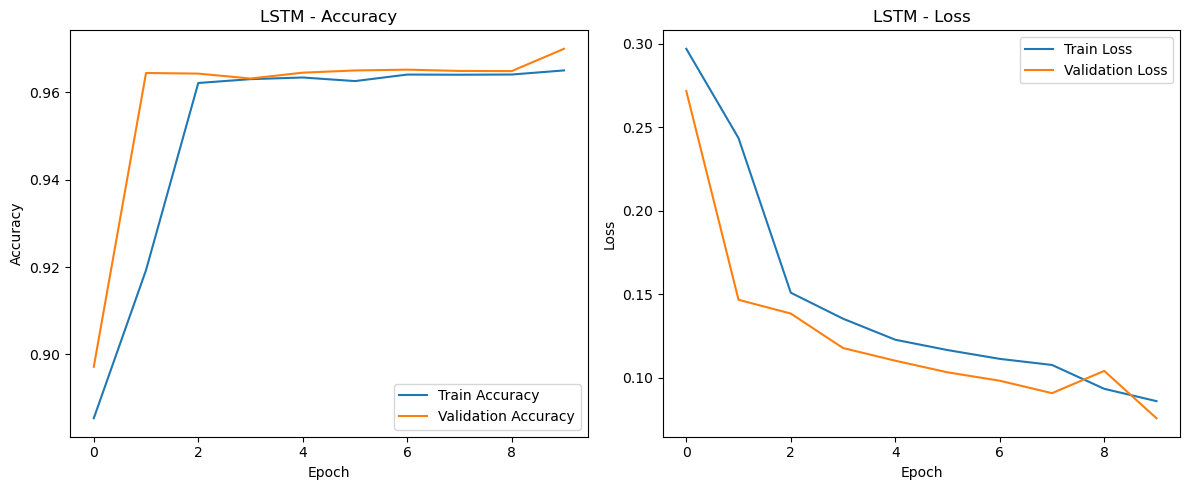

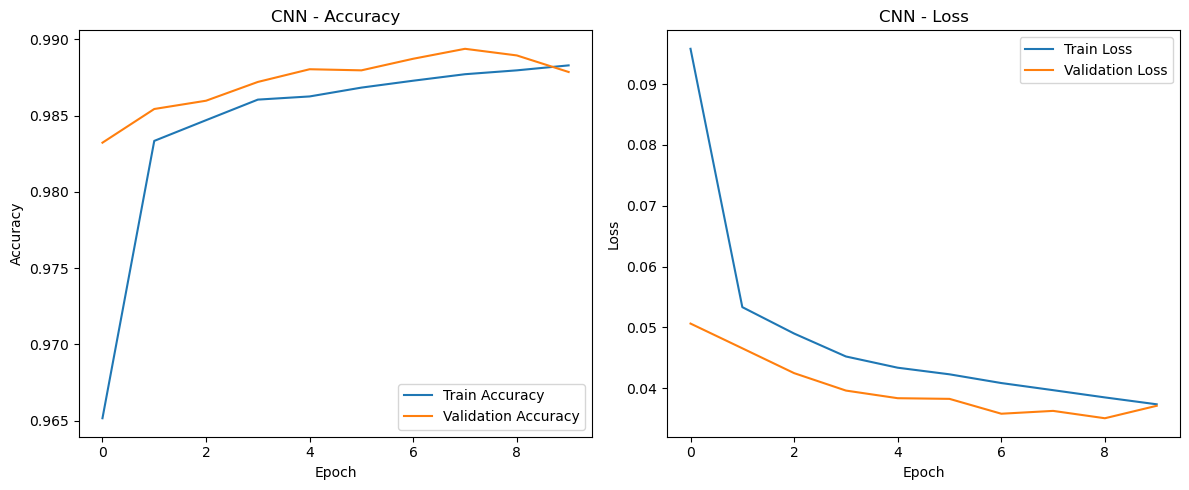

In [59]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_lstm, "LSTM")
plot_history(history_cnn, "CNN")


### Model Serialization

In [60]:
# Choose and save the better performing model
cnn_model.save("cnn_malware_detector.h5")
lstm_model.save("lstm_malware_detector.h5")


## Hybrid of CNN-LSTM Model Building

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Define model
hybrid_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    LSTM(32),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
hybrid_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hybrid_model.summary()


c:\Users\gech\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 52, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 24, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 12, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,961 (347.50 KB)

 Trainable params: 88,961 (347.50 KB)

 Non-trainable params: 0 (0.00 B)

### hybrid Model traning

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_hybrid = hybrid_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9046 - loss: 0.2388 - val_accuracy: 0.9766 - val_loss: 0.0797
Epoch 2/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9751 - loss: 0.0801 - val_accuracy: 0.9802 - val_loss: 0.0587
Epoch 3/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9785 - loss: 0.0670 - val_accuracy: 0.9808 - val_loss: 0.0567
Epoch 4/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9803 - loss: 0.0596 - val_accuracy: 0.9849 - val_loss: 0.0446
Epoch 5/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9820 - loss: 0.0551 - val_accuracy: 0.9855 - val_loss: 0.0470
Epoch 6/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9839 - loss: 0.0505 - val_accuracy: 0.9864 - val_loss: 0.0426
Epoch 7/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9848 - loss: 0.0484 - val_accuracy: 0.9865 - val_loss: 0.0442
Epoch 8/15
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9860 -

## Hybrid Model Evaluation

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

def evaluate_all_models(models, model_names, X_test, y_test):
    results = []

    plt.figure(figsize=(15, 5))

    for idx, model in enumerate(models):
        y_pred_proba = model.predict(X_test).ravel()
        y_pred = (y_pred_proba >= 0.5).astype(int)

        # Metrics
        conf = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        results.append({
            "Model": model_names[idx],
            "Accuracy": report['accuracy'],
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1 Score": report['1']['f1-score'],
            "ROC AUC": roc_auc,
            "Loss": model.evaluate(X_test, y_test, verbose=0)[0]
        })

        # Confusion matrix plot
        plt.subplot(2, len(models), idx + 1)
        sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_names[idx]} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

        # ROC Curve plot
        plt.subplot(2, len(models), len(models) + idx + 1)
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f"{model_names[idx]} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

    plt.tight_layout()
    plt.show()

    return results


863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
863/863 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
863/863 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


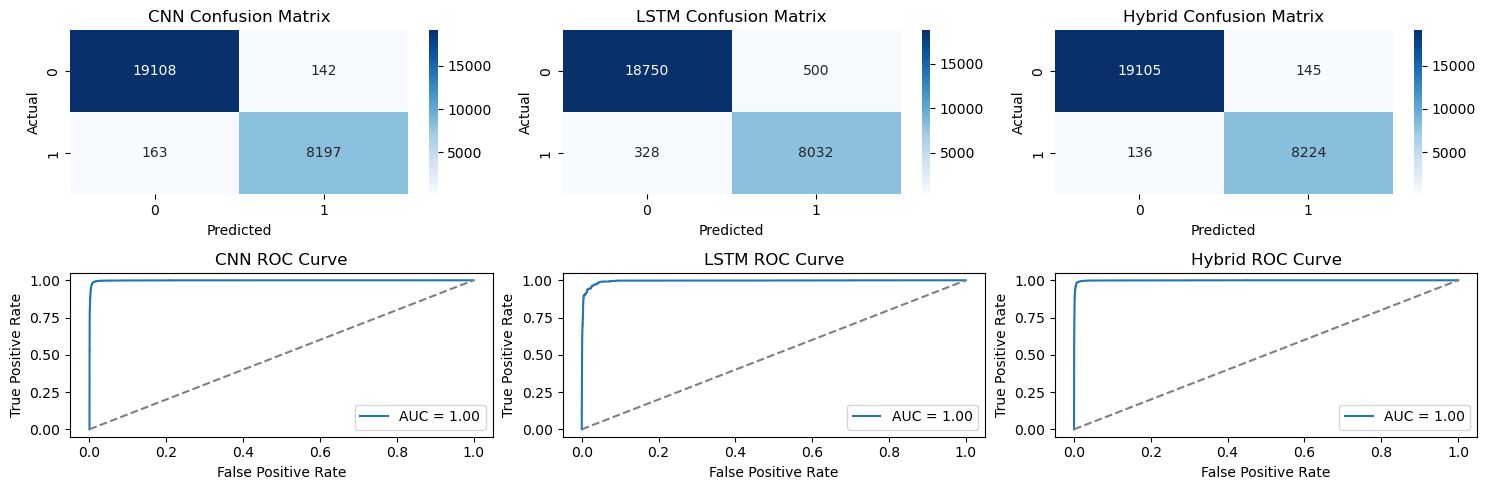

{'Model': 'CNN', 'Accuracy': 0.9889532777978993, 'Precision': 0.9829715793260583, 'Recall': 0.9805023923444977, 'F1 Score': 0.9817354332594767, 'ROC AUC': 0.9988042067979868, 'Loss': 0.03506713733077049}
{'Model': 'LSTM', 'Accuracy': 0.9700108656283956, 'Precision': 0.9413970932958274, 'Recall': 0.9607655502392345, 'F1 Score': 0.9509827137106323, 'ROC AUC': 0.9951458895171813, 'Loss': 0.07560015469789505}
{'Model': 'Hybrid', 'Accuracy': 0.9898225280695401, 'Precision': 0.9826741546182339, 'Recall': 0.9837320574162679, 'F1 Score': 0.9832028214477853, 'ROC AUC': 0.9988141645435904, 'Loss': 0.03269227221608162}


In [64]:
results = evaluate_all_models(
    [cnn_model, lstm_model, hybrid_model],
    ['CNN', 'LSTM', 'Hybrid'],
    X_test,
    y_test
)
for res in results:
    print(res)


## Model Comaparison

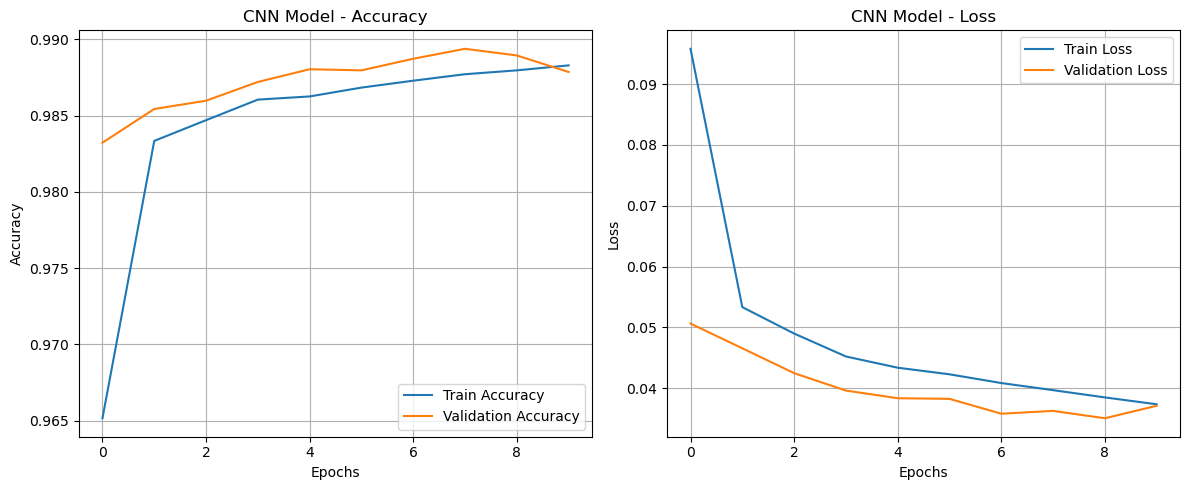

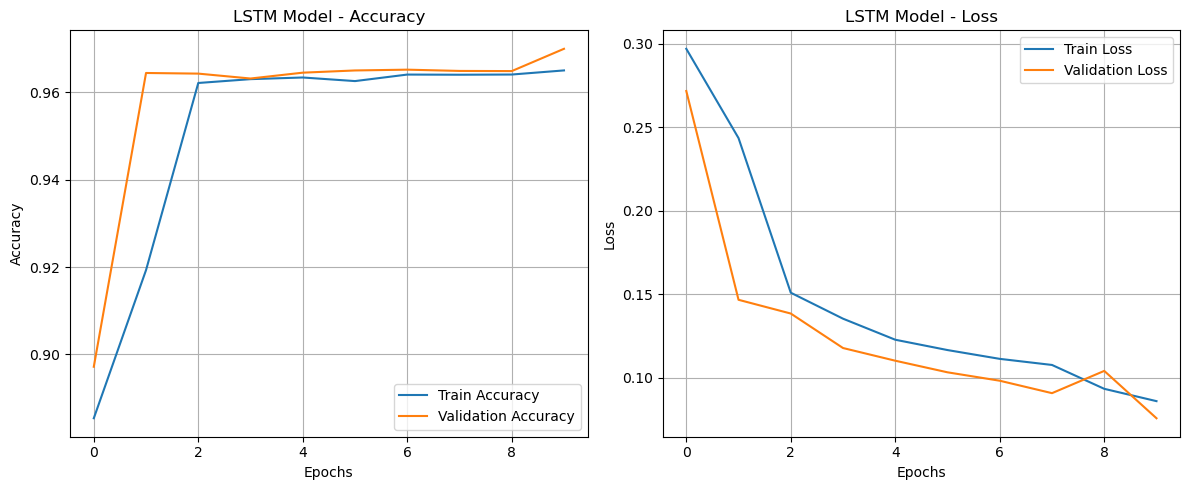

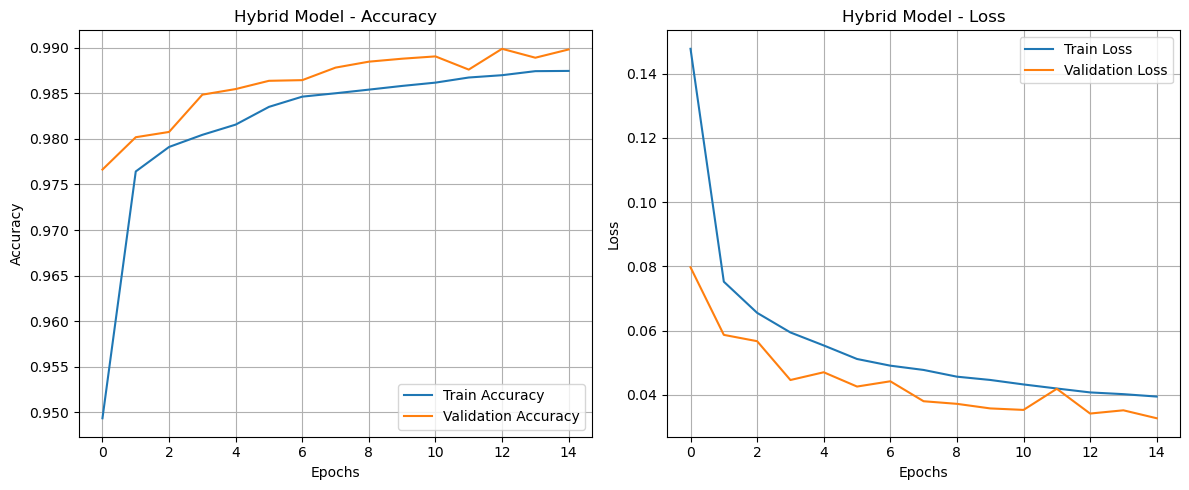

In [69]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot for each model
plot_history(history_cnn, "CNN Model")
plot_history(history_lstm, "LSTM Model")
plot_history(history_hybrid, "Hybrid Model")


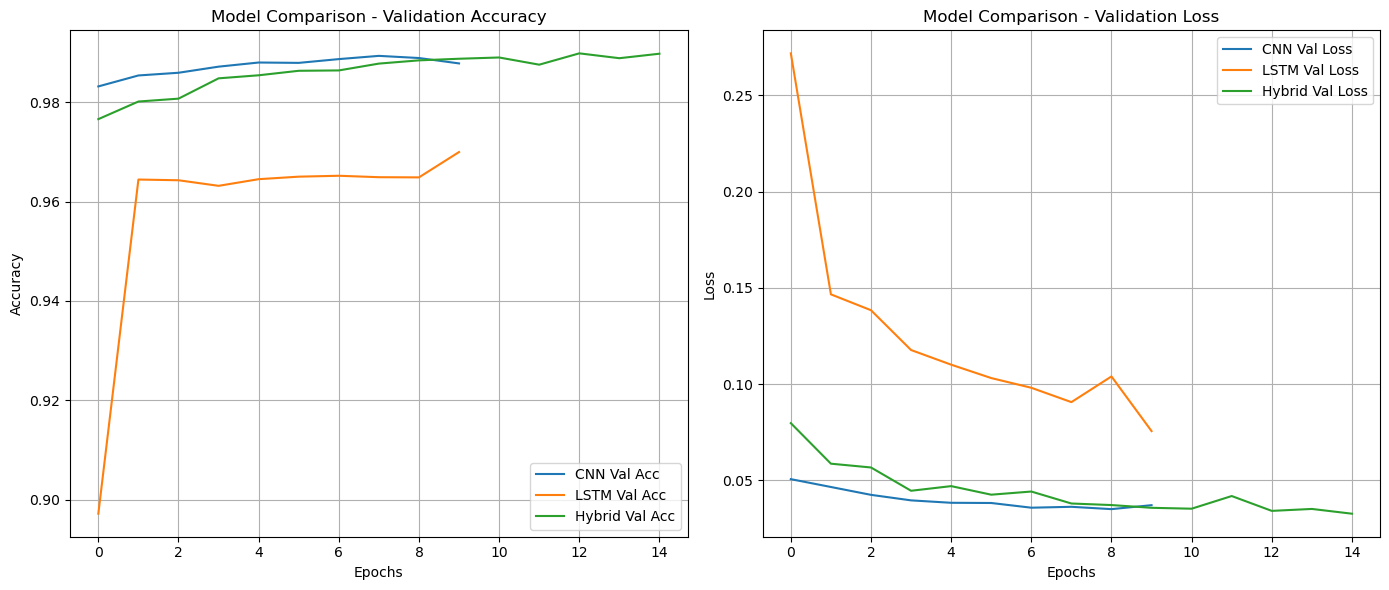

In [70]:
import matplotlib.pyplot as plt

def plot_model_comparison(histories, model_names):
    plt.figure(figsize=(14, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=f'{name} Val Acc')
    plt.title('Model Comparison - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Model Comparison - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Use the histories from training
plot_model_comparison(
    histories=[history_cnn, history_lstm, history_hybrid],
    model_names=["CNN", "LSTM", "Hybrid"]
)


In [71]:
# Choose and save the better performing model
hybrid_model.save("cnn_LSTM_malware_detector.h5")
hybrid_model.save("lstm_LSTM_malware_detector.h5")

<h2 style="color:blue;">NB: From the dataset and the algorithms used, I have obtained the following performance metrics:</h2>

<!-- Model Performance Table -->
<table border="1" cellspacing="0" cellpadding="10" style="border-collapse: collapse; width: 100%; font-family: Arial;">
    <thead style="background-color: #f2f2f2;">
        <tr>
            <th>Model</th>
            <th>Training Accuracy</th>
            <th>Testing Accuracy</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1 Score</th>
            <th>Training Time (sec)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="color:purple;"><b>XGBoost Classifier</b></td>
            <td align="center">99.73%</td>
            <td align="center">99.45%</td>
            <td align="center">98.96%</td>
            <td align="center">99.23%</td>
            <td align="center">99.10%</td>
            <td align="center">1.03</td>
        </tr>
        <tr>
            <td style="color:purple;"><b>Random Forest</b></td>
            <td align="center">98.35%</td>
            <td align="center">98.44%</td>
            <td align="center">97.92%</td>
            <td align="center">96.91%</td>
            <td align="center">97.41%</td>
            <td align="center">1.03</td>
        </tr>
        <tr>
            <td style="color:purple;"><b>Logistic Regression</b></td>
            <td align="center">95.38%</td>
            <td align="center">95.28%</td>
            <td align="center">98.41%</td>
            <td align="center">86.14%</td>
            <td align="center">91.87%</td>
            <td align="center">2.12</td>
        </tr>
        <tr>
            <td style="color:purple;"><b>DNN (Deep Neural Network)</b></td>
            <td align="center">73.4%</td>
            <td align="center">72.4%</td>
            <td align="center">68.4%</td>
            <td align="center">58.18%</td>
            <td align="center">73.11%</td>
            <td align="center">7.46</td>
        </tr>
        <tr>
            <td style="color:purple;"><b>CNN (Convolutional Neural Network)</b></td>
            <td align="center">99.88%</td>
            <td align="center">98.90%</td>
            <td align="center">98.30%</td>
            <td align="center">98.05%</td>
            <td align="center">98.17%</td>
            <td align="center">5.4</td>
        </tr>
        <tr>
            <td style="color:purple;"><b>LSTM (Long Short-Term Memory)</b></td>
            <td align="center">97.51%</td>
            <td align="center">97.00%</td>
            <td align="center">94.14%</td>
            <td align="center">96.08%</td>
            <td align="center">95.10%</td>
            <td align="center">5.1</td>
        </tr>
        <tr>
            <td style="color:purple;"><b>Hybrid CNN_LSTM</b></td>
            <td align="center">99.88%</td>
            <td align="center">98.98%</td>
            <td align="center">98.27%</td>
            <td align="center">98.37%</td>
            <td align="center">98.32%</td>
            <td align="center">5.3</td>
        </tr>
    </tbody>
</table>

<br>

<!-- Conclusion Section -->
<h1 style="color:green;">Conclusion:</h1>
<p>✔ <b>XGBoost</b> shows the highest overall performance across all evaluation metrics with minimal training time.</p>
<p>✔ <b>Hybrid CNN_LSTM</b> and <b>CNN</b> also demonstrate excellent performance, especially in deep learning approaches, with extremely high ROC AUC values.</p>
<p>✔ <b>DNN</b> shows lower performance, suggesting it's less suitable for this dataset compared to ensemble and hybrid deep models.</p>
<p>✔ <b>Logistic Regression</b> performs moderately and is outperformed by tree-based and neural models.</p>
<p>✔ These results prove that machine learning, particularly ensemble and hybrid deep learning models, can detect malware with high accuracy and reliability.</p>
<p>✔ This system can serve as a foundational defense mechanism for real-time malware detection in AI-driven security solutions.</p>
